<a href="https://colab.research.google.com/github/brunoalvoliv/relatorios-financeiros/blob/main/Relat%C3%B3rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [1]:
!pip install yfinance
!pip install investpy
!pip install fpdf

     |████████████████████████████████| 6.4 MB 15.1 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 4.4 MB 12.0 MB/s 
     |████████████████████████████████| 235 kB 75.6 MB/s 
     |████████████████████████████████| 503 kB 61.5 MB/s 
     |████████████████████████████████| 

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40725 sha256=348be8bc5faafacbf05f2c7c460525a0984404432f3f60c834dc3548bef2c8bf
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf


In [2]:
import pandas as pd
import numpy as np 
import yfinance as yf 
import investpy as inv
import matplotlib.pyplot as plt
import datetime as datetime 
from fpdf import FPDF

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # BP, DRE e DFC

## Buscando os dados

In [5]:
inicio = '01/01/2019'
fim = '31/12/2021'

dados = inv.get_stock_historical_data('TOTS3', country='brazil', from_date=inicio, to_date=fim)
dados.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-01-02,8.94,9.51,8.94,9.46,2389203,BRL
2019-01-03,9.58,9.69,9.42,9.68,2295902,BRL
2019-01-04,9.69,10.07,9.45,9.95,1548602,BRL
2019-01-07,10.06,10.07,9.51,9.73,1675502,BRL
2019-01-08,9.68,9.79,9.34,9.34,2816103,BRL


## Balanço Patrimonial

In [6]:
bp = inv.get_stock_financial_summary('TOTS3', country='brazil', summary_type='income_statement', period='quarterly')
bp = bp.T.head()

bp['Total'] = bp.apply(np.sum, axis=1)
bp

Date,2021-09-30 00:00:00,2021-06-30 00:00:00,2021-03-31 00:00:00,2020-12-31 00:00:00,Total
Total Revenue,854.54,763.38,720.26,689.49,3027.67
Gross Profit,600.78,538.33,515.66,482.55,2137.32
Operating Income,119.33,127.14,127.91,121.34,495.72
Net Income,88.92,78.64,80.64,96.15,344.35


In [7]:

bp['Total'] = bp.apply(np.sum, axis=1)
bp

Date,2021-09-30 00:00:00,2021-06-30 00:00:00,2021-03-31 00:00:00,2020-12-31 00:00:00,Total
Total Revenue,854.54,763.38,720.26,689.49,6055.34
Gross Profit,600.78,538.33,515.66,482.55,4274.64
Operating Income,119.33,127.14,127.91,121.34,991.44
Net Income,88.92,78.64,80.64,96.15,688.70


# Relatório

Buscando dados

In [8]:
tickers = ['TOTS3.SA', '^BVSP']

inicio = datetime.datetime(2019, 1, 1)
fim = datetime.datetime(2021, 12, 31)

'''inicio = '01/01/2019'
fim = '31/12/2021'

empresa = inv.get_stock_historical_data(ticker, country='brazil', from_date=inicio, to_date=fim)
dados.head()'''

dados = pd.DataFrame()

for i in tickers:
  dados[i] = yf.download(i, start=inicio, end=fim)['Adj Close']

dados.rename(columns={'^BVSP': 'Ibovespa'}, inplace=True)

dados.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TOTS3.SA,Ibovespa
Date,,
2019-01-02,9.294829,91012.0
2019-01-03,9.508951,91564.0
2019-01-04,9.771734,91841.0
2019-01-07,9.560859,91699.0
2019-01-08,9.171546,92032.0


Retorno acumulado

In [9]:
ret_simples = np.log(dados/dados.shift())
ret_simples.fillna(0, inplace=True)

ret_acum = ((1 + ret_simples).cumprod() - 1) * 100

Visualização

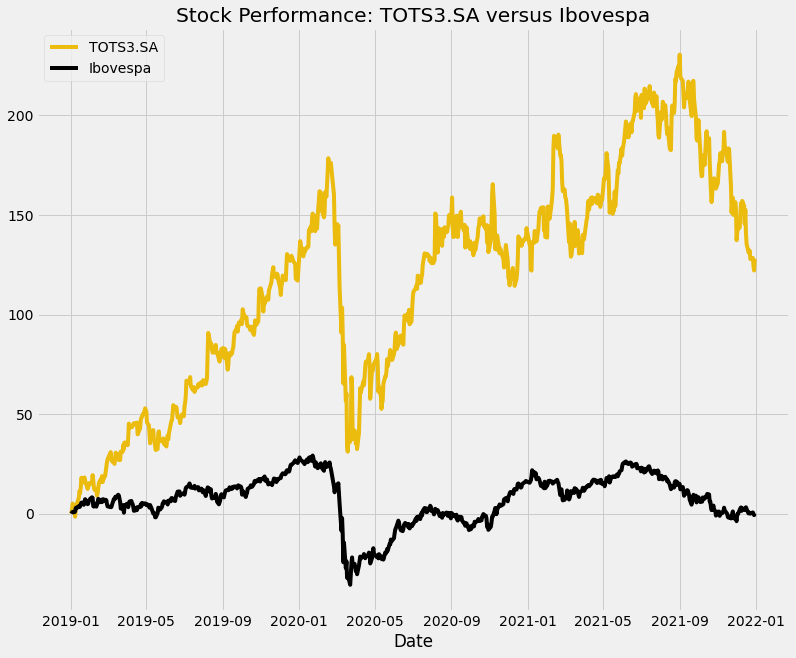

In [10]:
plt.figure(figsize=(12, 10));
plt.title(f'Stock Performance: {ret_acum.columns[0]} versus {ret_acum.columns[1]}');
plt.plot(ret_acum.iloc[:, :1], color='#ebbb0e', label=f'{ret_acum.columns[0]}');
plt.plot(ret_acum.iloc[:, 1:2], color='black', label=f'{ret_acum.columns[1]}');
plt.xlabel('Date');
#plt.ylabel('Retorno acumulado (%)');
plt.legend();

Informações da empresa

In [11]:
empresa = tickers[0]

info_empresa = yf.Ticker(empresa)
#info_empresa.info

keys_info = ['beta', 'market', 'longName', 'industry', 'marketCap', 'priceToBook', 
             'website', 'symbol', 'shortName', 'averageDailyVolume10Day', 'payoutRatio','longBusinessSummary']

a_subset = {key: info_empresa.info[key] for key in keys_info}
a_subset

{'averageDailyVolume10Day': 5115850,
 'beta': 1.317957,
 'industry': 'Software—Application',
 'longBusinessSummary': 'TOTVS S.A. develops and sells management software, productivity and collaboration platforms, and consulting and related services in Brazil. The company offers implementation, assistance, and maintenance services; and solutions for system management, point of sale, commercial automation, tax solutions, e-commerce, and mobility. It also offers ERP solution; business intelligence products, including data integration, Big data, processing services, and insights and customization; Fluig, a productivity and collaboration platform; and HR solutions for the manufacturing, retail, legal, services, and distribution industries. TOTVS S.A. was founded in 1983 and is headquartered in SÃ£o Paulo, Brazil.',
 'longName': 'TOTVS S.A.',
 'market': 'br_market',
 'marketCap': 17166042112,
 'payoutRatio': 0.3175,
 'priceToBook': 4.099027,
 'shortName': 'TOTVS       ON      NM',
 'symbol': '

# PDF

In [14]:
def add_linhas(negrito_1, normal_1, negrito_2, normal_2):
  pdf.add_font("Arial", "", "arial.ttf", uni=True)
  pdf.set_font('Arial', 'B', 12)
  pdf.cell(30, 10, negrito_1, 0, 0)

  pdf.set_font('Arial', '', 12)
  pdf.cell(65, 10, normal_1, 0, 0, align='C')

  pdf.set_font('Arial', 'B', 12)
  pdf.cell(30, 10, negrito_2, 0, 0)

  pdf.set_font('Arial', '', 12)
  pdf.cell(65, 10, normal_2, 0, 1, align='C')

In [15]:
largura = 210 #mm
altura = 297 #mm
margem = 10 #mm

#Configuralções
pdf = FPDF('P', 'mm', 'A4')
pdf.add_page()
pdf.set_font('Arial', 'B', 14)
pdf.set_auto_page_break(auto=bool, margin=margem)

#Cabeçalho
pdf.image('/content/drive/MyDrive/Colab Notebooks/Relatórios financeiros/Arquivos/imagem1.png', x=-0.1, y=-0.1, w=largura)
pdf.image('/content/drive/MyDrive/Colab Notebooks/Relatórios financeiros/Arquivos/imagem2.png', x=0, y=altura - 10, w=largura + 0.1)

#Título
simbolo = a_subset['symbol']
nome = a_subset['shortName']
pdf.cell(largura-2*margem, 10, '', 0, 1)
pdf.cell(60, 5, '', 0, 1)
pdf.cell(2+largura-2*margem, 10, f'{nome} ({simbolo}) - Resultado: 4T2021', border=0, ln=1, align='L')
pdf.cell(60, 10, '', 0, 1)

#Detalhes  da empresa
pdf.set_font('Arial', 'BU', 12)
pdf.cell(60,10, 'Detalhes da empresa:', 0, 1)

#Linhas
add_linhas('Nome:', a_subset['longName'], 'Ticker:', a_subset['symbol'])
add_linhas('Mercado:', a_subset['market'], 'Setor:', a_subset['industry'])
pdf.cell(60, 5, '', 0, 1)

#Indicadores
pdf.set_font('Arial', 'BU', 12)
pdf.cell(60, 10, 'Incadores:', 0, 1)

#Linhas
num = a_subset['marketCap']
market_cap = format(num, ',').replace(',', '.')
add_linhas('Cap. Mercado ($):', market_cap, 'Price to book:', str(round(a_subset['priceToBook'], 2)))
add_linhas('Beta:', str(round(a_subset['beta'], 2)), 'Payout Ratio:', str(round(a_subset['payoutRatio'], 2)))
pdf.cell(60, 5, '', 0, 1)

#Gráfico:
pdf.set_font('Arial', 'BU', 12)
pdf.cell(60, 10, 'Análise Gráfica', 0, 1)
img_path = '/content/grafico_relatorio.png'
pdf.image(img_path, x=pdf.get_x(), w=largura-2*margem, h=(altura-pdf.get_y()-2*margem))

#Rodapé
pdf.set_font('Arial', '', 8)
data_hoje = datetime.datetime.now().strftime('%d-%m-%Y')
nota_rodape = f'Análise {tickers[0]}. Relatório gerado a {data_hoje}.'

pdf.text(x=largura - len(nota_rodape)*1.5 - margem, y=altura - margem/2, txt=nota_rodape)

pdf.output('relatorio_oficial.pdf', 'F')


''